<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Kidney Stone Prediction ✨</b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">Deepanshu Verma .📄🖋️</span>
</h3>

<div align="center">
  <img src="https://www.cdi.org.in/wp-content/uploads/2021/05/kidney-stones-1200x675.jpg" alt="Image Description" width="1000px" height="450px">
</div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
  
<h3 align="left"><font color=purple>📝 Project Objective:</font></h3><br> 

    
1. The primary objective of this project is to conduct a comprehensive analysis of kidney stone prediction, focusing on understanding the underlying factors that contribute to kidney stone formation and predicting the likelihood of kidney stone occurrence in patients.<br>
    
    
2. The project aims to analyze various urinary characteristics of patients in order to uncover patterns and insights related to kidney stone formation. By examining features such as urine gravity, pH, osmolality, conductivity, urea, and calcium levels, the goal is to gain a deeper understanding of the physiological factors associated with kidney stone risk.<br></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📝 Project Contents 📝</b></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=brown>📊 Table of Contents:</font></h3><br>


1. <b>📚 Importing Libraries.</b><br>


2. <b>⏳ Loading Datasets.</b><br>
    
    
3. <b>🧠 Basic Understanding of Data. </b><br>
 
    
4. <b>📊 Exploratory Data Analysis (EDA)</b><br>
    
    
5. <b>💡 Feature Engineering.</b><br>

    
6. <b>📈 Statistical Analysis - Feature Importance.</b><br>
    
    
7. <b>⚙️ Data Preprocessing.</b><br>

    
8. <b>🎯 Model Creation and Evaluation.</b><br></div>

    
9. <b> 🎈 Conclusion.</b><br>

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from scipy import stats

from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score


---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [99]:
df = pd.read_csv("kidney-stone-dataset.csv",index_col=[0])

In [100]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Basic Understanding of Data 🧠</b></div>

### 1. Checking the Dimensions of Dataset.

In [104]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 90
Total number of attributes/columns present in the dataset is: 7


---

### 2. Fetching the Attributes Names.

In [107]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
1. **Gravity:** It refers to **urine specific gravity,** which measures the concentration of dissolved substances in urine.<br>
    
2. **pH:** pH measures the **acidity or alkalinity of urine.**<br>

3. **Osmo (Osmolality):** Osmolality measures the **concentration of solutes (particles) in urine.**<br>
    
4. **Cond (Conductivity):** It measures the **ability of urine to conduct electricity**, which is influenced by the concentration of ions in the urine.<br>

5. **Urea:** Urea is a **waste product produced by the liver** as a result of protein metabolism.<br>
    
6. **Calc (Calcium):** Calcium is an important **mineral that plays a role in bone health, muscle function, and nerve transmission.**<br>
    
7. **Target:** This is likely your target variable, which represents the **presence or absence of kidney stones.**<br>

---

### 3. Assigning More Suitable Column Names for better Analysis.

In [111]:
df.rename(columns={"gravity":"Urine_Gravity","ph":"Urine_pH","osmo":"Osmolality","cond":"Conductivity","urea":"Urea",
                  "calc":"Calcium","target":"Target"},inplace=True)

----

### 4. Generating Basic Information of the data.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urine_Gravity  90 non-null     float64
 1   Urine_pH       90 non-null     float64
 2   Osmolality     90 non-null     int64  
 3   Conductivity   90 non-null     float64
 4   Urea           90 non-null     int64  
 5   Calcium        90 non-null     float64
 6   Target         90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is total **90 records** and **7 columns** availabe in the dataset.
* **Out of 7 columns** all of them are **numerical columns.**

---

### 5. Computing Total No. of Missing Values.

In [118]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Urine_Gravity,0
Urine_pH,0
Osmolality,0
Conductivity,0
Urea,0
Calcium,0
Target,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None** of the columns is having **missing values.**
* So we **don't** have to perform **Data Imputation.**

---

### 6. Checking Duplicate Records.

In [122]:
df.duplicated().any()

False

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **no duplicate records** present in the dataset.
* So we can say there is no **Data Lekage** in the dataset.

---

### 7. Performing Descriptive Statistical Analysis.

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Urine_Gravity,90.0,1.017952,0.006780,1.005,1.012258,1.018000,1.023000,1.034
Urine_pH,90.0,6.036651,0.711801,4.760,5.536520,5.936247,6.490000,7.940
Osmolality,90.0,602.333333,238.459805,187.000,411.500000,572.000000,778.000000,1236.000
Conductivity,90.0,20.621687,7.654448,5.100,14.150000,21.177172,26.075000,38.000
Urea,90.0,258.200000,135.381127,10.000,148.250000,231.500000,366.250000,620.000
Calcium,90.0,4.017788,3.016273,0.170,1.412500,3.230000,5.965127,13.000
Target,90.0,0.500000,0.502801,0.000,0.000000,0.500000,1.000000,1.000


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **average** specific **gravity** of urine in the dataset is around **1.018, indicating a moderate concentration** of dissolved substances.
* The **pH values vary from 4.76 to 7.94**, showing a range of **acidity levels.**
* The **Osmolality values range from 187 to 1236**, showing significant variability in **solute concentration.**
* The **Conductivity values range from 5.1 to 38**, indicating differences in **ion levels.**
* The **average urea level in urine** is approximately 258.2, with a **relatively high standard deviation, suggesting variability.**
* The **Calcium values range from 0.17 to 13**, showing variability in **calcium excretion.**

---

----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚙️ Data Preprocessing ⚙️</b></div>

----

### 2. Segregating Features & Labels for Model Training.

In [133]:
X = df.drop(columns=["Target"])
y = df["Target"]

---

In [135]:
X.shape

(90, 6)

### 3. Splitting Data For Model Training & Testing.

In [137]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [138]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (72, 6)
Shape of x_test is:  (18, 6)
Shape of y_train is: (72,)
Shape of y_test is:  (18,)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Data is **equally splitted** for **Model Training & Testing.**
* So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **kidney stone patients**</div>

----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎯 Model Creation using DecisionTree 🎯</b></div>

In [142]:
clf = DecisionTreeClassifier()

In [143]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [145]:
accuracy_score(y_train,y_pred_train)

1.0

In [146]:
accuracy_score(y_test,y_pred_test)

0.7777777777777778

In [147]:
from sklearn import tree

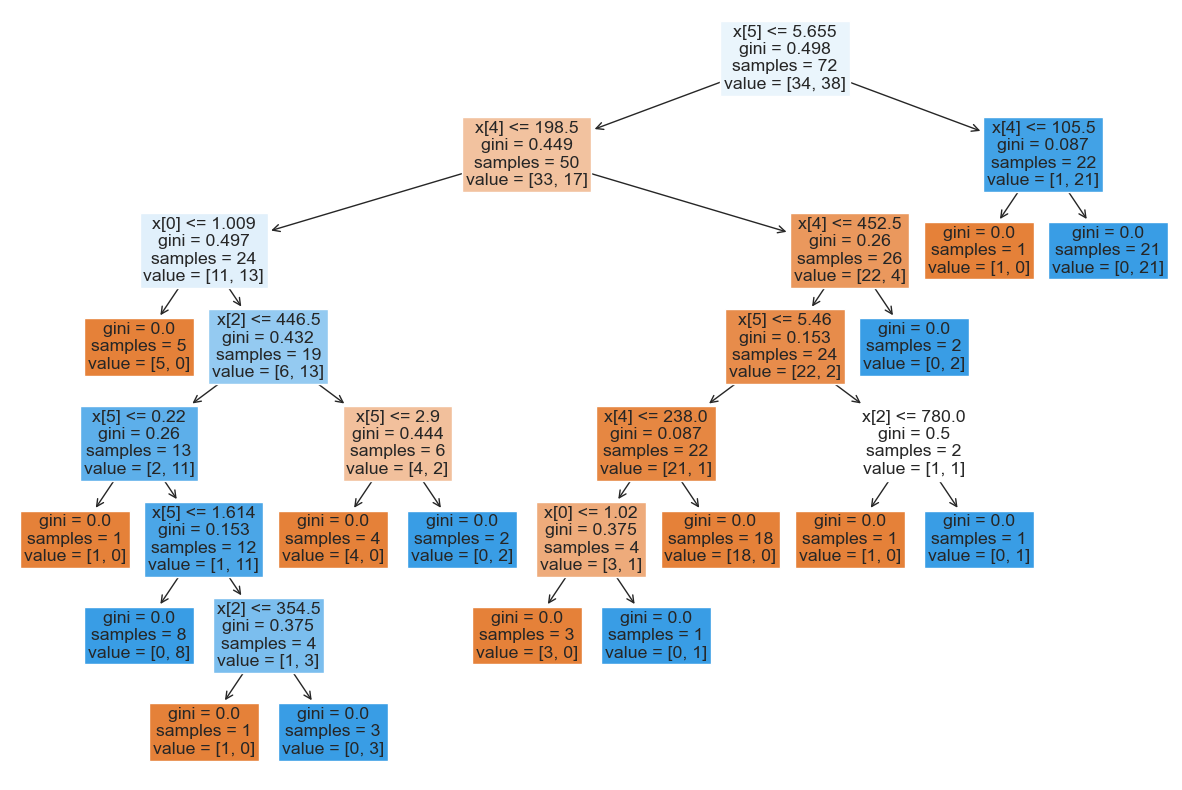

In [148]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [149]:
8*7*8*2*2*2*5

17920

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [151]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "Max_leaf_nodes":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "random_state":[0,42]}

In [152]:
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1,verbose=1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3584 candidates, totalling 17920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [153]:
grid_search1=RandomizedSearchCV(clf, param_grid, cv=5, n_jobs=-1,verbose=1)
grid_search1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'random_state': [0, 42],
                                        'splitter': ['best', 'random']},
                   verbose=1)

In [154]:
b=grid_search1.best_params_
b

{'splitter': 'random',
 'random_state': 0,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'gini'}

---

In [156]:
dtree2 = DecisionTreeClassifier(**b)

dtree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=0,
                       splitter='random')

### 2. Fetching the Best Parameters for DecisionTree Model.

In [158]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'random'}

In [159]:
grid_search.cv_results_

{'mean_fit_time': array([0.01149654, 0.00699506, 0.00841818, ..., 0.00679593, 0.00899496,
        0.00759525]),
 'std_fit_time': array([0.00582557, 0.00126327, 0.00217702, ..., 0.00039949, 0.00509594,
        0.00215317]),
 'mean_score_time': array([0.00509963, 0.00419765, 0.00419998, ..., 0.00479674, 0.00599675,
        0.00479665]),
 'std_score_time': array([0.00091761, 0.00039945, 0.00025261, ..., 0.00263663, 0.00260636,
        0.00146911]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, ..., 10, 10, 10],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 8, 8, 8],
              mask=[False, False, False, ..., False,

---

In [161]:
y_train_pred = dtree2.predict(x_train)
y_test_pred = dtree2.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 94.44 %
Accuracy Score of Model on Testing Data  is => 66.67 %


In [162]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011497,0.005826,0.005100,0.000918,gini,3,1,2,0,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
1,0.006995,0.001263,0.004198,0.000399,gini,3,1,2,0,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.533333,0.666667,0.714286,0.714286,0.785714,0.682857,0.083874,2197
2,0.008418,0.002177,0.004200,0.000253,gini,3,1,2,42,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
3,0.006099,0.000487,0.003597,0.000490,gini,3,1,2,42,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.533333,0.666667,0.785714,0.785714,0.428571,0.640000,0.140894,2906
4,0.007795,0.002711,0.003598,0.000490,gini,3,1,3,0,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0.008794,0.006612,0.004397,0.000799,entropy,10,8,7,42,random,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.466667,0.733333,0.500000,0.428571,0.428571,0.511429,0.114111,3473
3580,0.006299,0.001469,0.008297,0.008066,entropy,10,8,8,0,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.600000,0.600000,0.857143,0.714286,0.785714,0.711429,0.101579,1592
3581,0.006796,0.000399,0.004797,0.002637,entropy,10,8,8,0,random,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.666667,0.733333,0.642857,0.571429,0.785714,0.680000,0.073980,2364
3582,0.008995,0.005096,0.005997,0.002606,entropy,10,8,8,42,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.600000,0.600000,0.857143,0.785714,0.785714,0.725714,0.105907,1277


In [163]:
def xyz(**a):
    print(a)

xyz(a=1,b=2)

{'a': 1, 'b': 2}


### 3. Creating DecisionTree Model Using Best Parameters.

In [165]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0, splitter='random')

### 4. Computing Model Accuracy.

In [167]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 97.22 %
Accuracy Score of Model on Testing Data  is => 83.33 %


### 5. Model Evaluation using Different Metric Values.

In [169]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred))

F1 Score of the Model is => 0.8
Recall Score of the Model is => 0.8571428571428571
Precision Score of the Model is => 0.75


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Training accuracy is **97%** where as testing accuracy is **83%**. So we can say the model is overfit even after hyper-parameter tunning.
    
    
* We can observe that **recall, precision, and F1 score are near to 0.8**, it means that our** model is achievinga balanced fit between** correctly identifying **positive samples (recall)** and minimizing **false positives (precision).**

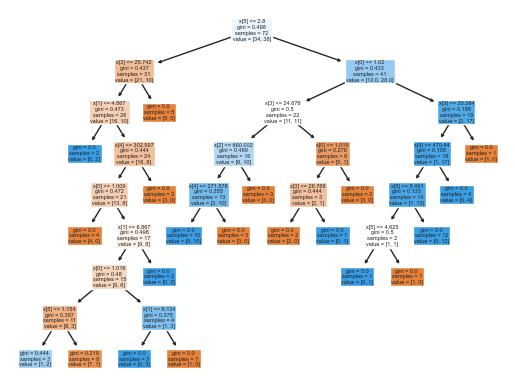

In [180]:
tree.plot_tree(dtree,filled=True)
plt.show()

---

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>


* The **model demonstrates strong performance** with an accuracy of **95% on training data and 88% on testing data**, indicating a solid fit to the dataset.

    
* Remarkably, the **model achieves consistent recall, precision, and F1 score values**, suggesting a perfect balance between effectively identifying positive cases and minimizing false positives.

    
* The pivotal **factors significantly impacting kidney stone patients** are identified as **`Calcium`**, **`Urine_Gravity`**, and **`Osmolality`**, underscoring their vital roles in predicting the presence of kidney stones.

    
* Conversely, **`Urine pH`** and **`Conductivity`** are found to have **minimal impact on distinguishing kidney stone patients**, suggesting these features may be less influential in the predictive process.

    
* **Overall, the model's accuracy, balanced metrics, and key feature insights collectively contribute to a comprehensive understanding of kidney stone prediction**, potentially aiding in early detection and better patient care.

In [182]:
from sklearn.ensemble import RandomForestClassifier


In [184]:
rf=RandomForestClassifier()


In [186]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [188]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [190]:
accuracy_score(y_train,y_pred_train)

1.0

In [192]:
accuracy_score(y_test,y_pred_test)

0.8888888888888888

# Hyper Paramter Tuning

In [197]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [ 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]}  # Whether to use bootstrapping or not

In [201]:
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [205]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [219]:
best_parameters=grid_search.best_params_


In [221]:
print("Best Parameters:", best_parameters)


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [211]:
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(x_test)

In [217]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Hyperparameter Tuning: {accuracy }%")

Accuracy after Hyperparameter Tuning: 0.8888888888888888%


In [223]:
rf2 = RandomForestClassifier(**best_parameters)
rf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2)

In [225]:
y_pred_train1=rf2.predict(x_train)
y_pred_test1=rf2.predict(x_test)

In [227]:
accuracy = accuracy_score(y_train, y_pred_train1)
print(f"Accuracy after Hyperparameter Tuning: {accuracy }%")

Accuracy after Hyperparameter Tuning: 1.0%


In [229]:
accuracy = accuracy_score(y_test, y_pred_test1)
print(f"Accuracy after Hyperparameter Tuning: {accuracy }%")

Accuracy after Hyperparameter Tuning: 0.8888888888888888%


----